In [16]:
from RDMM.CreateDataSets import *
import matplotlib.pyplot as plt
from RDMM.VisualizeDatasets import visualize_fits
from RDMM.QualityFunctions import *
from RDMM.utils import *

In [52]:
def plot_df(df_in, ax, class_val, color="k"):
    df = df_in[df_in['class']==class_val]
    df_other = df_in[df_in['class']!=class_val]
    
    ax.scatter(df['x'],df['y'], color="gray")
    ax.scatter(df_other['x'],df_other['y'], color=color, s=80)

    x=np.linspace(-50,50)
    beta=np.polyfit(df['x'],df['y'],1)
    y=np.polyval(beta,x)
    ax.plot(x,y, color="gray")
    #ax.grid()
    ax.axis("square")
    ax.set_xlim([-50,50])
    ax.set_ylim([-50,50])
    ax.set_xlabel("age", fontsize=25)




col1="class_1_1"
col2="attr1"


from itertools import product
def plot_all(df, col1, col2, color_map, ax=None):
    if ax is None:
        ax = plt.gca()
    all_a = (df[col1]).unique()
    
    all_b = (df[col2]).unique()
    for a,b in product(all_a, all_b):
        #print(a,b)
        inds = np.logical_and(df[col1]==a, df[col2]==b)
        df_tmp = df[inds]
        beta=np.polyfit(df_tmp['x'].to_numpy().copy(),df_tmp['y'].to_numpy().copy(),1)
        x=np.linspace(-50,50)
        y=np.polyval(beta,x)
        color = color_map.get((a,b), "gray")
        linewidth=1.5
        if (a,b) in color_map:
            linewidth=3.5
        ax.plot(x,y, color=color,linewidth=linewidth )

In [40]:
df1,df2,_,_,_=generate_two_regression_dataframes([200,300],1,1)

In [41]:
df1_hide=hide(df1,2,100)
d={0:'red',1:'green',2:'blue'}#,3:'blue'}
df1_hide['attr1']=(df1_hide['class_1_0'].astype(int)+(1-df1_hide['class_1_0'])*2*df1_hide['Noise_0'].astype(int)).apply(d.get)


In [42]:
df2_hide=hide(df2,2,100)

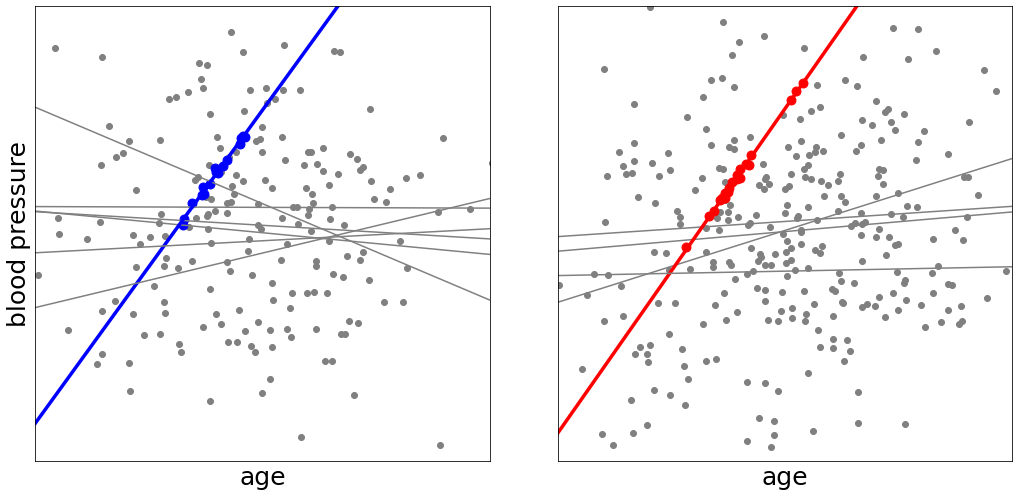

In [53]:

fig, axs = plt.subplots(1, 2,figsize=(15, 7), sharey=True)
#plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')
fig.set_tight_layout(True)

ax0 = axs[0]
ax1 = axs[1]

ax0.set_xticks([])
ax0.set_yticks([])
ax1.set_xticks([])


plot_df(df1_hide, ax0, class_val=0, color="b")
#plot_df(df1_hide, ax0, class_val=1, color="g")
ax0.set_ylabel("blood pressure", fontsize=25)
plot_df(df2_hide, ax1, class_val=0, color="r")
#plot_df(df2_hide, ax1, class_val=1, color="r")
        
        
plot_all(df1_hide, "class_1_1", "attr1", {(True, "green"):"b"}, ax = ax0)
plot_all(df2_hide, "class_1_0", "class_1_1", {(True, True):"r"}, ax = ax1)

In [54]:
#box = ax.get_tightbbox(fig.canvas.get_renderer()).expanded(1.02,1).transformed(fig.dpi_scale_trans.inverted())
        #box = full_extent(ax,0.01).transformed(fig.dpi_scale_trans.inverted())
fig.savefig("L:/experiments/xx2.png", bbox_inches='tight', dpi=300)